In [2]:
import numpy as np
import pandas as pd 

import re

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import seaborn as sns

In [3]:
df = pd.read_csv('/home/enno/uni/SS23/thesis/data/hendecads/stretches_w_groups.csv')
df['stretch_ix'] = df['stretch_ix'].apply(lambda x: list(map(int, x.strip('[]').split(','))))

df

,Unnamed: 0,id,seq,stretch_ix,stretch_seq,avg_cc,group_id
0,0,MCD6041253.1,Mrlvyvavaailcsfsttslagaektakragkfvektatragkfve...,"[1, 71]",rlvyvavaailcsfsttslagaektakragkfvektatragkfver...,0.001041,unassigned
1,1,MCD7737945.1,MQGRVFFREAAALILAAALSMAGLPASAAANSGIEAAALRTeeete...,"[41, 238]",eeetepstkeavqetavetdtgekpesgedgqeesaesteeeqeed...,0.000364,unassigned
2,2,MYF28459.1,Merlqtdllkeihalrgemhaefasvrqemhagfasirqemhaeta...,"[1, 73]",erlqtdllkeihalrgemhaefasvrqemhagfasirqemhaetas...,0.001002,unassigned
3,3,WP_168920948.1,MSDVFLTASYADREKVKTLGARWNPAEKRWYVPSGRDLSPFAAWLP...,"[437, 540]",aqslvveikhaasqqlllarhvvparmaevtaegrqalrtakaqsq...,0.000689,group_42
4,4,WP_026306873.1,MLLRRIARPLLSAAFIAEGIDILQNPGPLADRLSPALDFTRRRSQH...,"[172, 342]",slgwrgrraardakdhaealaataaaiaatarergtnlvdtarert...,0.000424,group_38
...,...,...,...,...,...,...,...
40585,40585,XP_034013580.1,MKLNWLLGILPIVAANFDDWSKADLTQFLEDRNVTVQKGDDLVQLA...,"[667, 798]",kdakksgesfaslasksgawyadafysvasesgesaasqalqtgqk...,0.000553,group_106
40586,40586,GFR06050.1,MSDVYMDDLLTGADDLESGRKLQEQLVSLLRGAGMELHKWSASNPL...,"[578, 680]",eqrsiseeyekirdyfkdlkiklrekftrfgqwvkgkyergleksk...,0.000696,group_9
40587,40587,KAG2190414.1,MSSSILRASIRRNATIANKRFYSAPPPPPYAPNNQGGGNGGLFLGL...,"[65, 170]",gtltkqgevvdqkiqegkqavrdkadeakakyeqskseagqavdqk...,0.000676,unassigned
40588,40588,MBY0528383.1,MRVYCSLLASLLTCATIASQPPPLVFNGGTNSLAPRRILAAEKQET...,"[734, 833]",isaltndknrmvrknavdslgffpwdakaivpllvallsdkdsdla...,0.000714,group_1_1


In [38]:
aa_dict = {'r': '+',
           'h': '+',
           'k': '+',
           'd': '-',
           'e': '-',
           's': 'polar',
           't': 'polar',
           'n': 'polar',
           'q': 'polar',
           'c': 'special',
           'u': 'special',
           'g': 'special',
           'p': 'special',
           'a': 'hydrophobic',
           'v': 'hydrophobic',
           'i': 'hydrophobic',
           'l': 'hydrophobic',
           'm': 'hydrophobic',
           'f': 'hydrophobic',
           'y': 'hydrophobic',
           'w': 'hydrophobic',
           'x': 'padding'}

aa_num_dict = {'r': 0,
               'h': 0,
               'k': 0,
               'd': 1,
               'e': 1,
               's': 2,
               't': 2,
               'n': 2,
               'q': 2,
               'c': 3,
               'u': 3,
               'g': 3,
               'p': 3,
               'a': 4,
               'v': 4,
               'i': 4,
               'l': 4,
               'm': 4,
               'f': 4,
               'y': 4,
               'w': 4,
               'x': 5}

color_dict = {'+': '#00A012',           # green  
              '-': '#D81B60',           # red
              'polar': '#FFC107',       # yellow
              'hydrophobic': '#1E88E5', # blue    
              'special': '#ADADAD',     # grey
              'padding': '#FFFFFF'}     # white 

color_num_dict = {0: '#00A012',           # green
                  1: '#D81B60',           # red
                  2: '#FFC107',           # yellow
                  3: '#1E88E5',           # blue
                  4: '#ADADAD',           # grey
                  5: '#FFFFFF'}           # white

In [156]:
# Letter code and color code for expected hendecad repeat
repeat = ['A', '*', '*', 'D', 'E', '*', '*', 'H', '*', '*', '*']
color_repeat = [color_dict['hydrophobic'], color_dict['special'], color_dict['special'], color_dict['hydrophobic'], color_dict['hydrophobic'], color_dict['special'], color_dict['special'], color_dict['hydrophobic'], color_dict['special'], color_dict['special'], color_dict['special']]

In [157]:
def plot_seq_pc(seq, n_shift=0):
    # @param shif: allows you to shift the sequence to the right by a certain amount cutting of the first n amino acids
    seq = seq[n_shift:]

    # Apply expected hendecad repeat to whole sequence
    positions = [repeat[i%11] for i in range(len(seq))]
    colors = [color_dict[aa_dict[aa]] for aa in seq]

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 2))

    ax1.bar(np.arange(len(seq)), np.ones(len(seq)), color=colors)
    ax1.set_yticks([])
    ax1.set_xticks(np.arange(len(seq)))
    ax1.set_xticklabels(positions)

    expected_colors = [color_repeat[i%11] for i in range(len(seq))]

    ax2.bar(np.arange(len(seq)), np.ones(len(seq)), color=expected_colors)
    ax2.set_yticks([])
    ax2.set_xticks([])

    for i in range(0, len(seq), 11):
        ax1.axvline(i-0.5, color='black', linestyle='--')
        ax2.axvline(i-0.5, color='black', linestyle='--')

    # Add legend
    legend_elements = [Patch(facecolor=color_dict[aa], edgecolor='black', label=aa) for aa in color_dict.keys()]
    plt.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.2, 1.1))
    
    plt.subplots_adjust(hspace=0.5)
    plt.show()


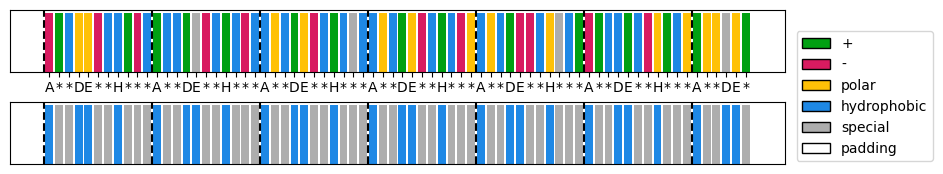

In [158]:
plot_seq_pc(df['stretch_seq'].iloc[2], n_shift=0)

In [159]:

    # fig = plt.figure(constrained_layout=True)
    
    # subfigs = fig.subfigures(3, 4, wspace=0.2, hspace=0.2)
    
    # for outer_ix, subfig in enumerate(subfigs.flat):
    #     axs = subfig.subplots(q+1, 1)
        
    #     if outer_ix == 12:
    #         break
        
    #     for inner_ix, ax in enumerate(axs.flat):
    #         start = inner_ix * 11 + outer_ix
    #         end = start + 11
            
            
            
    #         ax.set_yticks([])
    #         ax.set_xticks([])

    #         ax.bar(np.arange(11), np.ones(11), color=colors[start:end])
        
    
    # plt.show()


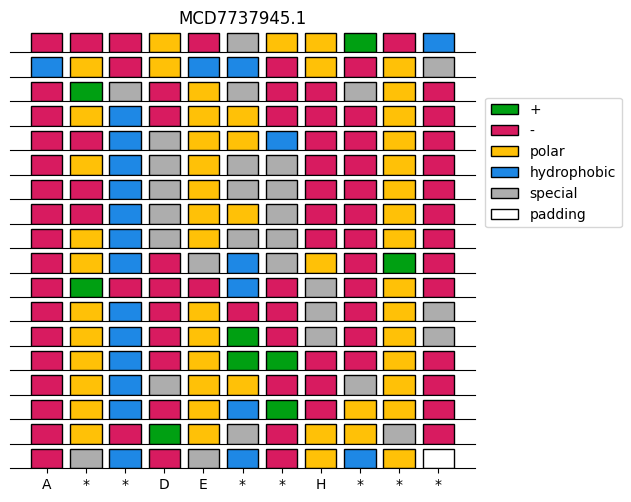

In [186]:
def plot_seq_pc(seq_id, seq, n_shift=0, save=False):
    seq = seq[n_shift:]
    
    n = len(seq)
    q = n // 11
    r = n % 11

    positions = [repeat[i%11] for i in range(len(seq))]
    colors = [color_dict[aa_dict[aa]] for aa in seq]
    
    # pad last hendecad with padding color
    if n % 11 != 0:
        positions += ['x'] * (11 - r)
        colors += [color_dict['padding']] * (11 - r)
    
    fig, axes = plt.subplots(q+1, 1, figsize=(6, q/3))

    first = True
    for ax in axes:
        
        if first:
            ax.set_title(seq_id) 
            first = False
        
        ax.bar(np.arange(11), np.ones(11), color=colors[:11], edgecolor='black')
        ax.set_yticks([])
        ax.set_xticks([])
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        
        colors = colors[11:]
        positions = positions[11:]

    ax.set_xticks(np.arange(11))
    ax.set_xticklabels(repeat)

    legend_elements = [Patch(facecolor=color_dict[aa], edgecolor='black', label=aa) for aa in color_dict.keys()]
    plt.legend(handles=legend_elements, loc='right', bbox_to_anchor=(1.33, q-2))
    
    if save:
        plt.savefig(f'/home/enno/uni/SS23/thesis/seq_analysis/plts/{seq_id}.png', bbox_inches='tight')
    else:
        plt.show()

plot_seq_pc(df['id'].iloc[1], df['stretch_seq'].iloc[1], n_shift=0)

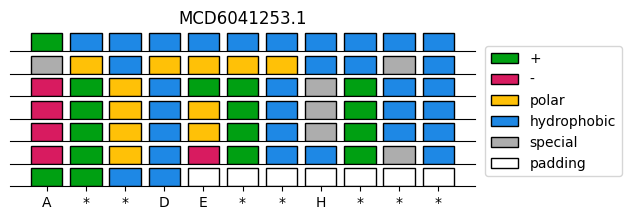

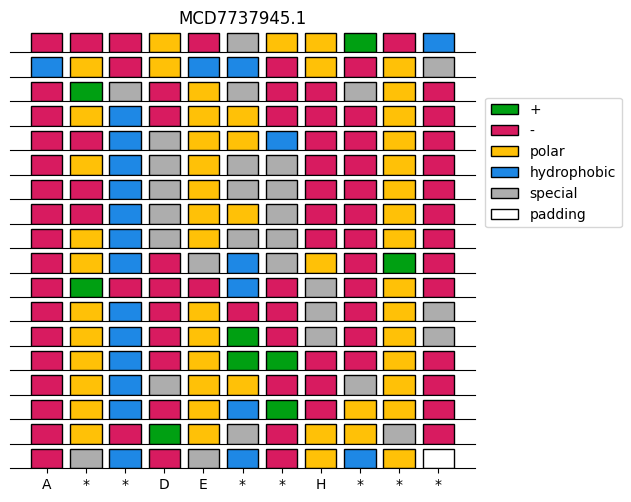

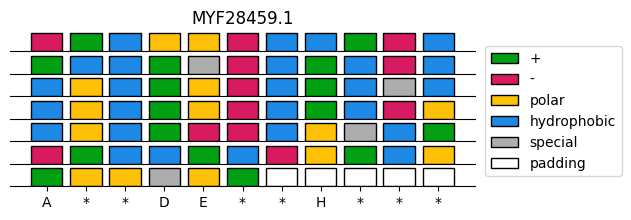

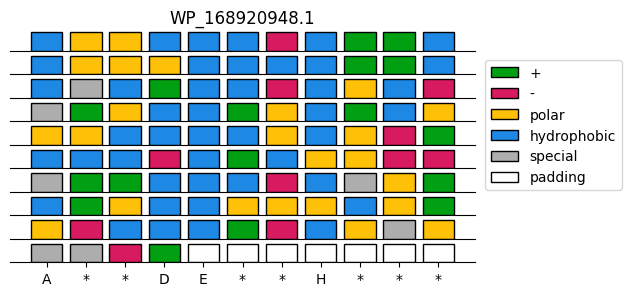

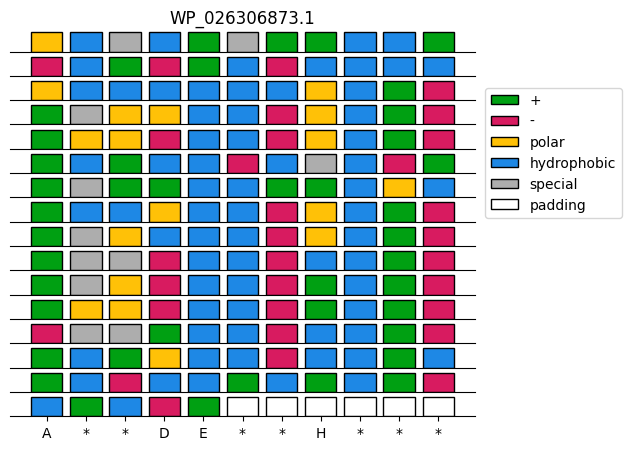

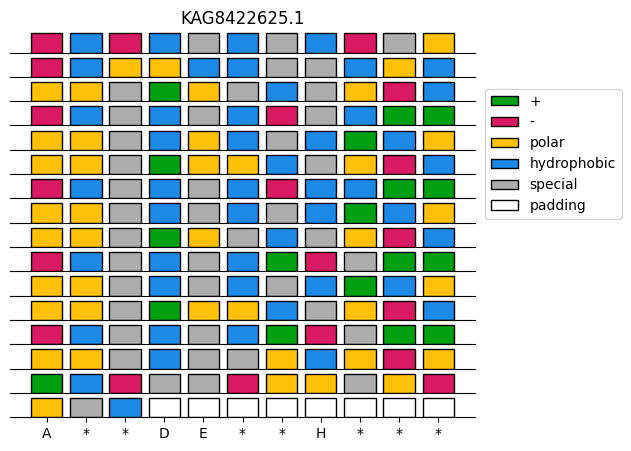

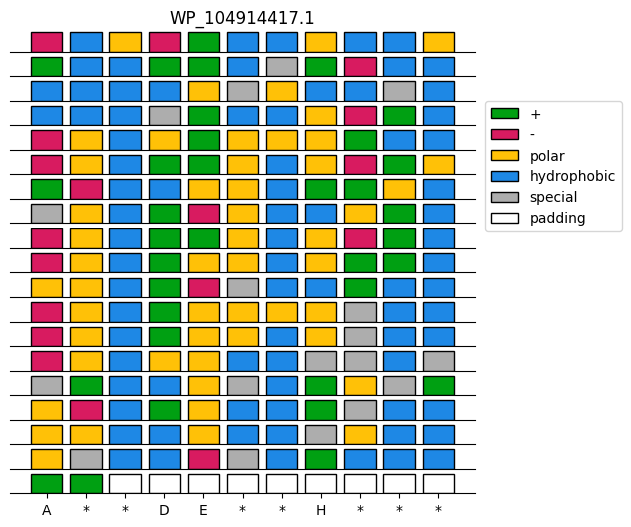

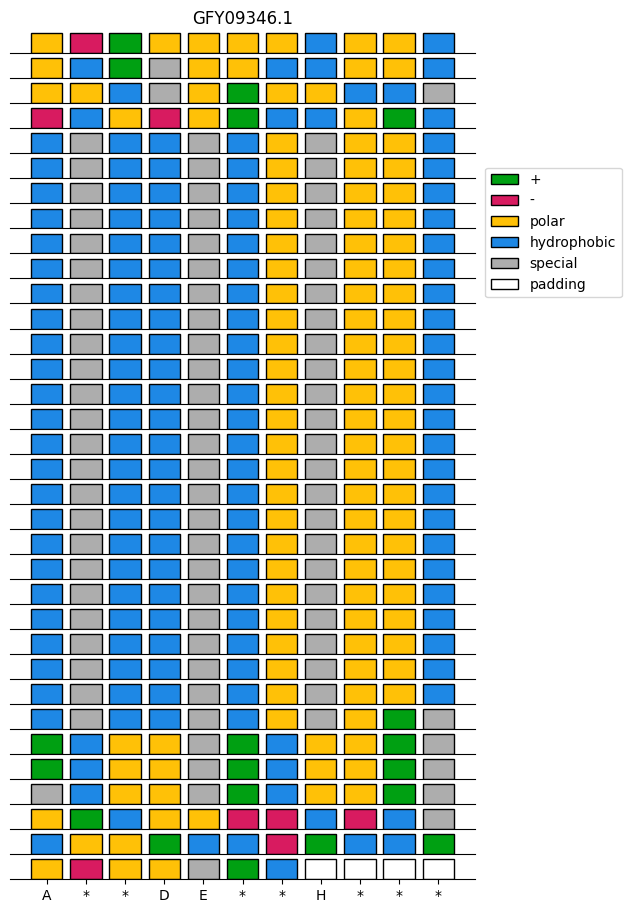

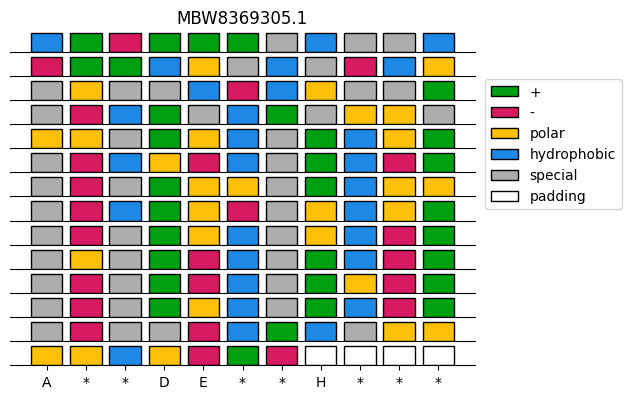

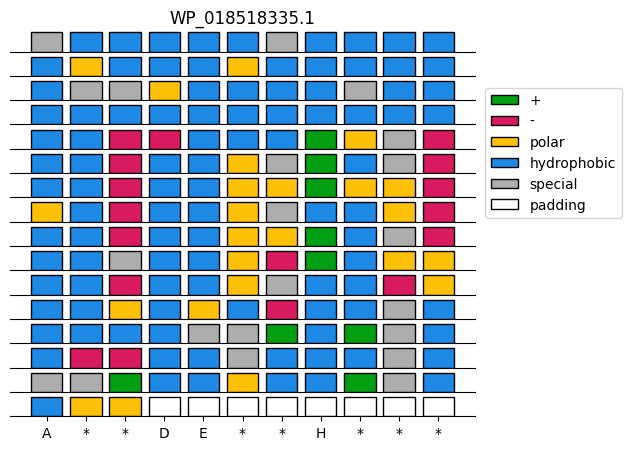

In [188]:
for i in range(10):
    plot_seq_pc(df['id'].iloc[i], df['stretch_seq'].iloc[i], save=True)

In [71]:
seq = df['stretch_seq'].iloc[0]
colors = [color_dict[aa_dict[aa]] for aa in seq]
colors[66:77]

['#00A012', '#00A012', '#1E88E5', '#1E88E5']

In [ ]:
# fig, axes = plt.subplots(q+1, 1, figsize=(10, 2))

    # for ax in axes:
    #     ax.bar(np.arange(11), np.ones(11), color=colors[:11])
    #     ax.set_yticks([])
    #     ax.set_xticks([])
        
    #     colors = colors[11:]
    #     positions = positions[11:]

    # Add legend
    # legend_elements = [Patch(facecolor=color_dict[aa], edgecolor='black', label=aa) for aa in color_dict.keys()]
    # plt.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.2, 1.1))
    
    # plt.subplots_adjust(hspace=0.5)
    # plt.show()


In [41]:
# Step 1: Create a sequence of amino acids
sequence = 'rhkdenstqcupavilmfywx' * 5  # example sequence

# Step 2: Convert the sequence into a matrix with 11 columns
matrix = [aa_num_dict[aa] for aa in sequence]
matrix = np.array(matrix).reshape(-1, 11)

# Step 3: Map the numbers to colors
color_matrix = np.vectorize(color_num_dict.get)(matrix)

# Step 4: Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, cmap=sns.color_palette(color_matrix.flatten()))
plt.show()

ValueError: cannot reshape array of size 105 into shape (11)